<a href="https://colab.research.google.com/github/Noob919/Python_Basic/blob/main/pristine_weight_loss_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model

In [ ]:
df =  pd.read_csv("/content/PRISTINE PET MP.csv")
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 3':"Weight loss", 'Unnamed: 4':"DTG",'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)
df_res =  df_na[['time', 'tem', 'heating rate', 'Weight loss']]
df_res.tail(3)

label = df_na['label']
label = label.reset_index()
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root']) 
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'Weight loss']
transform_df
dataframe = pd.concat([transform_df,label],axis =1)
dataframe
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(12, activation="sigmoid"),
        layers.Dense(1),
    ]
) 
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4) 

Epoch 1/50
195/195 [==============================] - 2s 4ms/step - loss: 0.0286 - root_mean_squared_error: 0.1692 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1171
Epoch 2/50
195/195 [==============================] - 1s 4ms/step - loss: 0.0025 - root_mean_squared_error: 0.0496 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1161
Epoch 3/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0024 - root_mean_squared_error: 0.0495 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1257
Epoch 4/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0024 - root_mean_squared_error: 0.0494 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1164
Epoch 5/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0024 - root_mean_squared_error: 0.0491 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1184
Epoch 6/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0024 - root_mean_squared_error: 0.0488 - val_loss: 0.0139 - val_

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 12)                72        
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


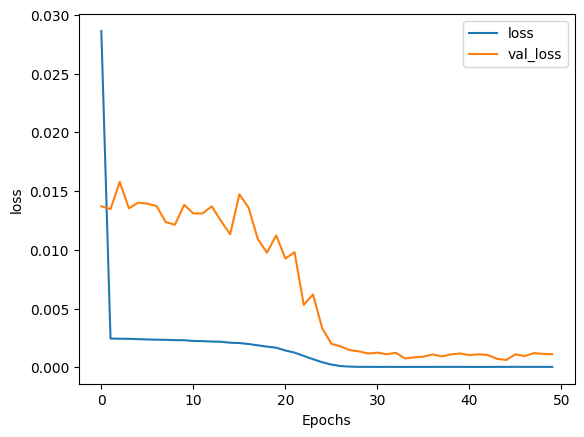

In [ ]:
met_df  = pd.DataFrame(model.history.history)
plt.plot(met_df['loss'], label = 'loss')
plt.plot(met_df['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

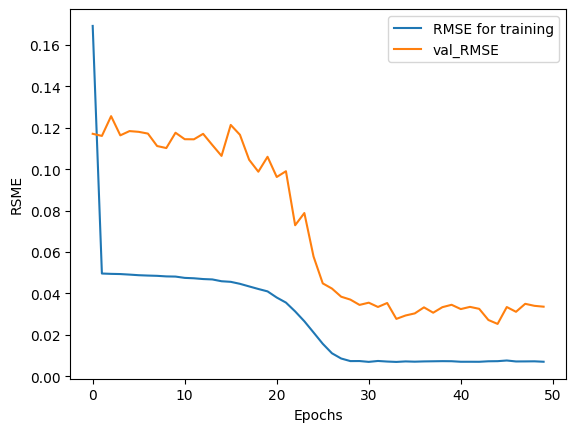

In [ ]:
plt.plot(met_df['root_mean_squared_error'], label = 'RMSE for training')
plt.plot(met_df['val_root_mean_squared_error'], label = 'val_RMSE')
plt.xlabel('Epochs')
plt.ylabel('RSME')
plt.legend()

In [ ]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']

X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
predictions = model.predict(X_val) 
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df

13/13 [==============================] - 0s 6ms/step


,time,tem,heating rate,preditions,Weight loss
0,0.000004,0.033313,0.999385,0.023487,0.010937
1,0.000311,0.300432,0.948733,0.103621,0.098216
2,0.000519,0.381624,0.915898,0.128315,0.124477
3,0.000808,0.465167,0.872187,0.153864,0.151356
4,0.001330,0.572406,0.798706,0.186826,0.185525
...,...,...,...,...,...
400,0.069152,0.995783,0.014911,0.083482,0.058405
401,0.069194,0.995785,0.014885,0.083320,0.058339
402,0.069294,0.995785,0.014833,0.082937,0.058221
403,0.069377,0.995785,0.014793,0.082620,0.058132


In [ ]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 0.0004790678757936592
RMSE 0.021887619235395592
MAE 0.01600900985631973
R2_Score 0.9069532103072023


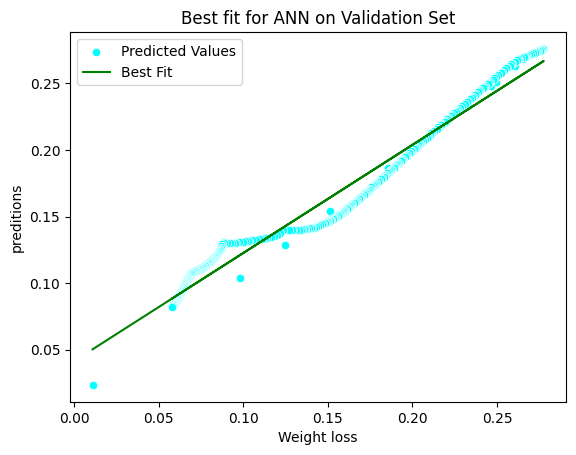

In [ ]:
x = final_df['Weight loss']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df, x='Weight loss', y='preditions', color='cyan', label='Predicted Values')
plt.plot(x, a*x+b, color='green', label = 'Best Fit') 
plt.title('Best fit for ANN on Validation Set')
plt.legend()

In [ ]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

predictions = model.predict(X_test)  
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

13/13 [==============================] - 0s 2ms/step
MSE 0.0004811016033877119
RMSE 0.02193402843500737
MAE 0.016065180749371247
R2_Score 0.9065466932816209


In [ ]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,0.000015,0.066503,0.997547,0.033340,0.021831
1,0.000224,0.256752,0.962819,0.090396,0.084016
2,0.000481,0.368694,0.921736,0.124373,0.120283
3,0.001133,0.536658,0.825627,0.175822,0.174176
4,0.001431,0.588983,0.785310,0.191932,0.190749
...,...,...,...,...,...
401,0.069163,0.995784,0.014903,0.083438,0.058386
402,0.069241,0.995785,0.014859,0.083139,0.058278
403,0.069262,0.995786,0.014848,0.083060,0.058252
404,0.069392,0.995785,0.014785,0.082563,0.058115


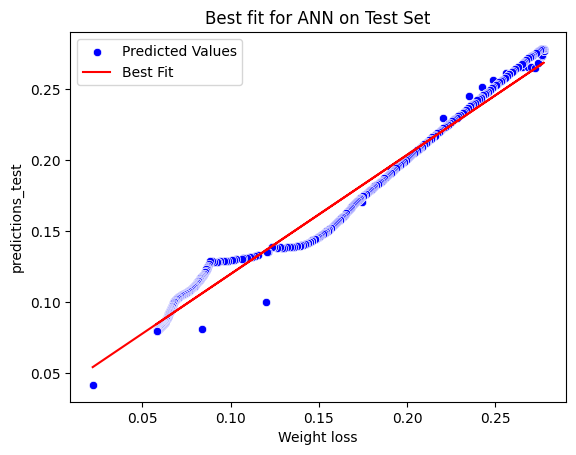

In [ ]:
x = final_df_test['Weight loss']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df_test, x='Weight loss', y='predictions_test', color='blue', label='Predicted Values')
plt.plot(x, a*x+b, color='red', label = 'Best Fit') 
plt.title('Best fit for ANN on Test Set')
plt.legend()

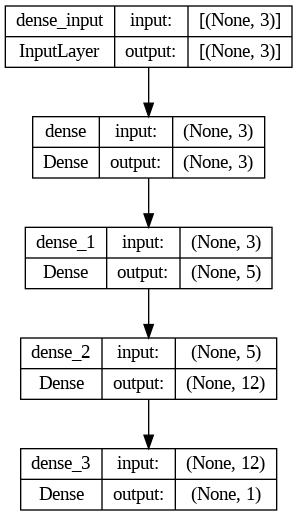

In [ ]:
plot_model(model, to_file='/content/model.jpg',show_shapes=True)